In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

c:\Users\KSpicer\Anaconda3\envs\victorian_authorship_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
wine_data = pd.read_csv('winequalityN.csv')
wine_data.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
wine_data = wine_data.dropna()
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine_data.rename(columns={"type": "white_wine"}, inplace=True)
print(wine_data['quality'].unique())
wine_data.head(20)

[6 5 7 8 4 3 9]


,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
wine_data.loc[wine_data["white_wine"] == "white", "white_wine"] = 1
wine_data.loc[wine_data["white_wine"] == "red", "white_wine"] = 0
wine_data.head(20)

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,1,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,1,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [7]:
wine_data.loc[wine_data['quality'] <= 6, 'quality'] = 0
wine_data.loc[wine_data['quality'] >= 7, 'quality'] = 1
(wine_data['quality'] == 1).sum()

1271

In [8]:
ct = make_column_transformer(
    (MinMaxScaler(), ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'density'])
)

In [9]:
X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

In [10]:
print(len(wine_data) * .80)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

5170.400000000001


In [11]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [12]:
X_train_normal

array([[0.28099174, 0.056     , 0.30894309, ..., 0.11797753, 0.44927536,
        0.08849046],
       [0.30578512, 0.344     , 0.01626016, ..., 0.17977528, 0.36231884,
        0.15943705],
       [0.28099174, 0.256     , 0.30894309, ..., 0.13483146, 0.66666667,
        0.07017544],
       ...,
       [0.18181818, 0.136     , 0.32520325, ..., 0.37078652, 0.36231884,
        0.1324465 ],
       [0.25619835, 0.296     , 0.08943089, ..., 0.24157303, 0.49275362,
        0.12396376],
       [0.28099174, 0.464     , 0.02439024, ..., 0.19662921, 0.24637681,
        0.19895894]])

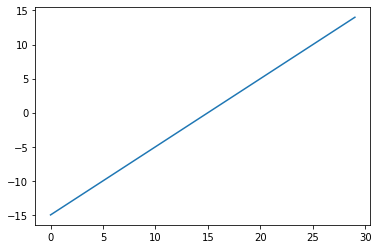

In [13]:
sample_ten = tf.cast(tf.range(-15, 15), tf.float32)
plt.plot(sample_ten)

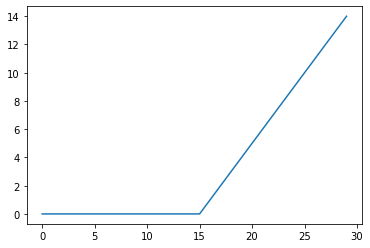

In [14]:
def relu(x):
    return tf.maximum(0, x)

plt.plot(relu(sample_ten))

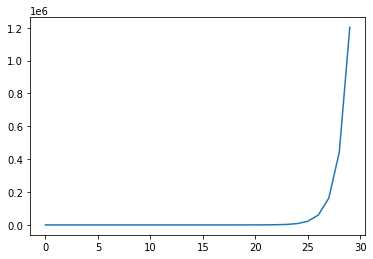

In [15]:
def sigmoid(x):
    return 1 / (tf.exp(-x))

plt.plot(sigmoid(sample_ten))

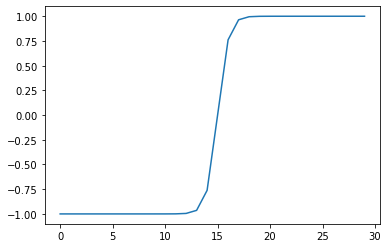

In [16]:
def tanh(x):
    return tf.tanh(x)

plt.plot(tanh(sample_ten))

In [17]:
tf.random.set_seed(45)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

history = model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
162/162 [==============================] - 1s 1ms/step - loss: 0.7012 - accuracy: 0.8023
Epoch 2/100
162/162 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.8023
Epoch 3/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.8023
Epoch 4/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.8023
Epoch 5/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.8023
Epoch 6/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.8023
Epoch 7/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8021
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8029
Epoch 9/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8048
Epoch 10/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4204 - accura

In [18]:
model_1.evaluate(X_train_normal, y_train)

162/162 [==============================] - 1s 1ms/step - loss: 0.3698 - accuracy: 0.8246


[0.3698377311229706, 0.8245648145675659]

<AxesSubplot:>

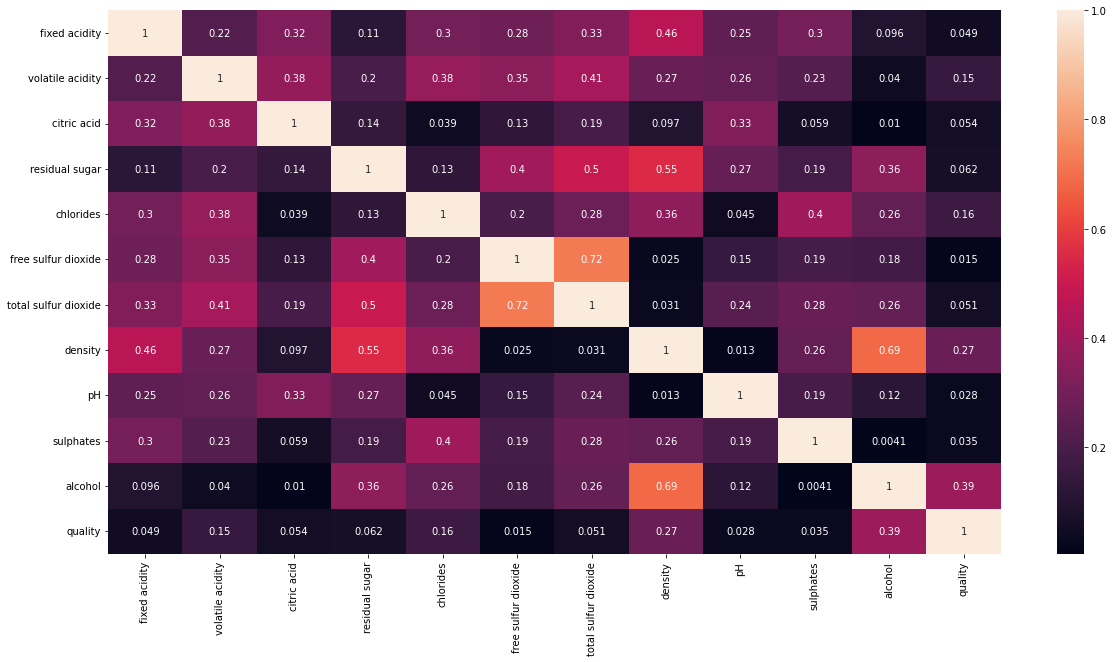

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(wine_data.corr().abs(), annot=True)

Text(0.5, 1.0, 'Model 1 Loss Curve')

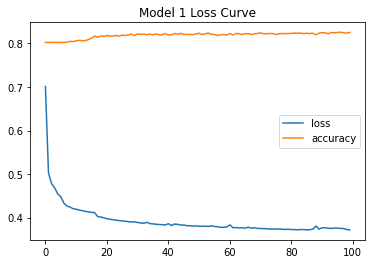

In [20]:
pd.DataFrame(history.history).plot()
plt.title("Model 1 Loss Curve")

In [21]:
tf.random.set_seed(66)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

# The callback works during model training
# At each epoch if we change the learning rate and the 
# schedular is going to give Adam the updated learning rate

# The learning rate starts at 1e-4 (.0001) and after each epoch 
# increase the learning rate 10^(epoch/20)
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_lr = model_2.fit(X_train_normal, y_train, 
epochs=100,
callbacks=[scheduler]) # You can have multiple callbacks

Epoch 1/100
162/162 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4648
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.7366
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.7944
Epoch 4/100
162/162 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.8021
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.8023
Epoch 6/100
162/162 [==============================] - 1s 5ms/step - loss: 0.5873 - accuracy: 0.8023
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.8023
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.8023
Epoch 9/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.8023
Epoch 10/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4899 - accura

Text(0.5, 1.0, 'Learning Rate vs. Loss')

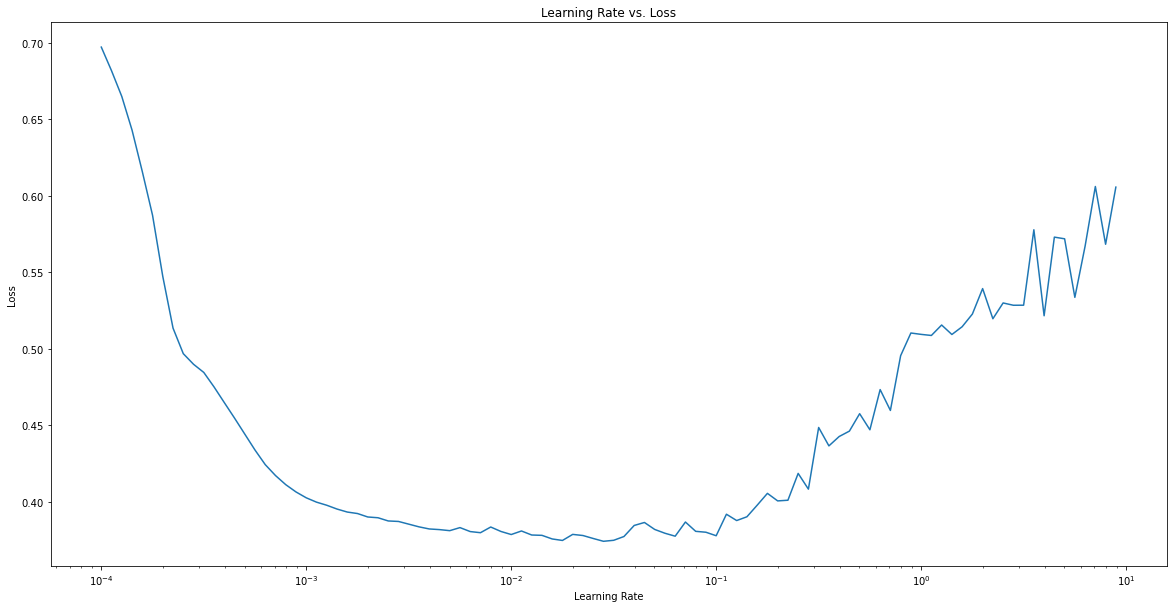

In [22]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [23]:
loss, acc = model_1.evaluate(X_test_normal, y_test)
print(f"Model Loss (Test Set): {loss}")
print(f"Model Accuracy (Test Set): {acc}")

41/41 [==============================] - 0s 873us/step - loss: 0.3955 - accuracy: 0.8221
Model Loss (Test Set): 0.3955022990703583
Model Accuracy (Test Set): 0.8221191167831421


In [24]:
#from tensorflow.keras.utils import plot_model
#plot_model(model_2, show_shapes=True)

AttributeError: module 'os' has no attribute 'errno'

In [26]:
weights, biases = model_2.layers[1].get_weights()
weights, weights.shape

(array([[-6.246638  , -0.9637364 , -5.1335807 , -7.0116706 ],
        [ 0.8703079 ,  0.71570176,  1.0928789 , -2.3560665 ],
        [-7.8838596 , -2.644665  , -4.112268  , -0.5446294 ],
        [-0.66962355, -2.1436021 , -1.5860093 , -1.4261227 ]],
       dtype=float32),
 (4, 4))

In [27]:
biases, biases.shape

(array([-0.58039033, -0.626688  , -0.13646318, -5.2558475 ], dtype=float32),
 (4,))

In [28]:
mnist = tf.keras.datasets.mnist

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

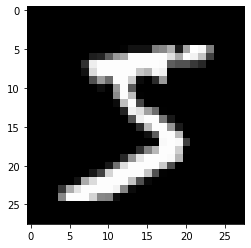

In [30]:
plt.imshow(X_train[0], cmap='gray')

In [31]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [32]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [33]:
label_names = np.unique(y_test)

In [35]:
# Set random seed
tf.random.set_seed(66)

# Create the model
# We have to flatten the 28x28 image
# Create a 4 value tensor for each of the 784 cells
# Optimize and create another 4 value tensor
# Output is 1 of the 10 possible labels
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Use SparseCategoricalCrossentropy if data isn't 
# normalized or one-hot encoded
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model_3.fit(X_train, 
                      y_train,
                      epochs=20,
                      validation_data=(X_test, y_test)) 

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2820 - accuracy: 0.5607 - val_loss: 0.8054 - val_accuracy: 0.7317
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7314 - accuracy: 0.7564 - val_loss: 0.6764 - val_accuracy: 0.7763
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6550 - accuracy: 0.7826 - val_loss: 0.6293 - val_accuracy: 0.7931
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6186 - accuracy: 0.7974 - val_loss: 0.6008 - val_accuracy: 0.8069
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5955 - accuracy: 0.8138 - val_loss: 0.5836 - val_accuracy: 0.8236
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5709 - accuracy: 0.8284 - val_loss: 0.5625 - val_accuracy: 0.8380
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5500 - accuracy: 0.8383 - val_loss: 0.5454 - val_accuracy:

In [36]:
# The ideal learning rate is where the loss decreases the most
# Set random seed
tf.random.set_seed(66)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Learning rate callback
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_lr = model_4.fit(X_train, 
                              y_train,
                              epochs=40,
                              validation_data=(X_test, y_test),
                              callbacks=[scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2820 - accuracy: 0.5607 - val_loss: 0.8054 - val_accuracy: 0.7317
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7269 - accuracy: 0.7581 - val_loss: 0.6704 - val_accuracy: 0.7769
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6470 - accuracy: 0.7851 - val_loss: 0.6209 - val_accuracy: 0.7953
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6090 - accuracy: 0.8055 - val_loss: 0.5852 - val_accuracy: 0.8259
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5748 - accuracy: 0.8286 - val_loss: 0.5546 - val_accuracy: 0.8368
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5478 - accuracy: 0.8374 - val_loss: 0.5436 - val_accuracy: 0.8403
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5337 - accuracy: 0.8427 - val_loss: 0.5238 - val_accuracy:

Text(0.5, 1.0, 'Learning Rate vs. Loss')

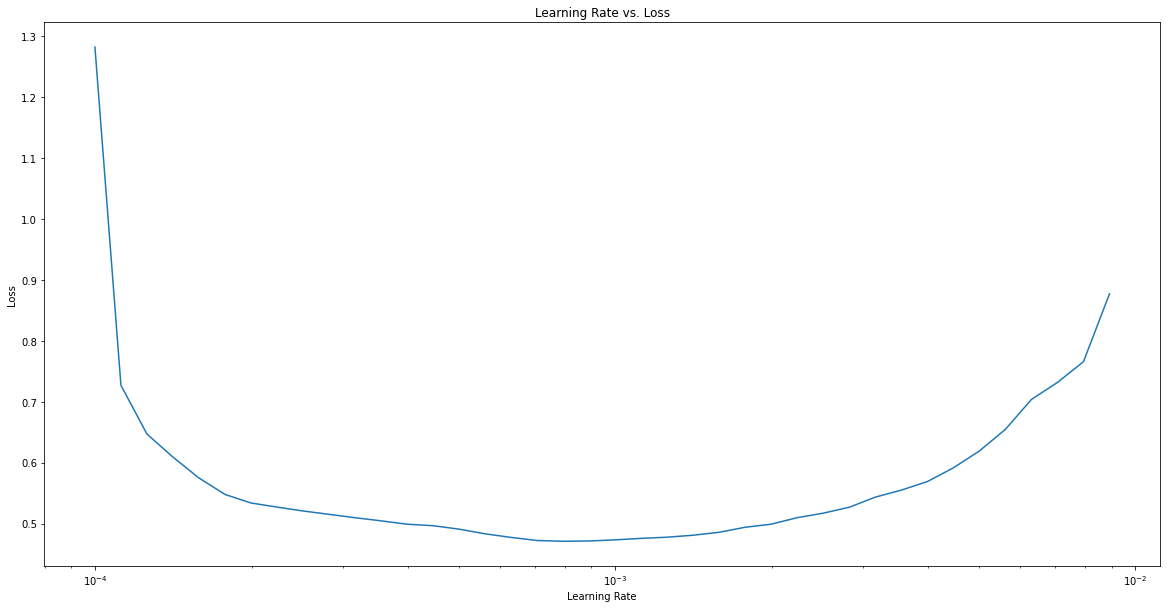

In [38]:
lrs = 1e-4 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [39]:
# Prediction Probabilities
y_prob = model_4.predict(X_test) 
y_prob[0]

array([3.1746615e-14, 1.7341366e-12, 1.2035971e-02, 7.3688194e-10,
       8.3658168e-05, 1.3751919e-08, 4.3789395e-18, 9.8656940e-01,
       1.0692090e-07, 1.3108773e-03], dtype=float32)

In [40]:
print(label_names[tf.argmax(y_prob[0])])
print(y_test[0])

7
7
